In [1]:
import sys
import sipm_position_histograms as sph
import sipm_1d_histograms as soh

In [4]:
import os

path_corners = "/home/smallsat/Desktop/grips-impress/geant4-impress-grips-piggyback/build/data-out/plate_corner_data"

cornerdir = os.listdir(path_corners)

print(cornerdir)


['40x5x40_GAGG_PPP_TEF_Corner_Test-run1-2023-03-20-12:44:42', '40x5x40_LYSO_RRR_ESR_Corner_Test-run2-2023-03-17-16:42:42', '40x5x40_GAGG_RRR_ESR_Corner_Test-run1-2023-03-20-12:48:06', '40x5x40_LYSO_RRR_TEF_Corner_Test-run3-2023-03-17-16:39:21', '40x5x40_GAGG_RRR_TEF_Corner_Test-run3-2023-03-20-12:43:48', '40x5x40_LYSO_RRR_TEF_Corner_Test-run4-2023-03-17-16:39:45', '40x5x40_LYSO_PPP_ESR_Corner_Test-run1-2023-03-20-12:57:46', '40x5x40_GAGG_RRR_TEF_Corner_Test-run2-2023-03-20-12:43:21', '40x5x40_GAGG_PPP_ESR_Corner_Test-run2-2023-03-20-12:51:25', '40x5x40_LYSO_PPP_ESR_Corner_Test-run4-2023-03-20-13:00:29', '40x5x40_LYSO_PPP_ESR_Corner_Test-run3-2023-03-20-12:59:32', '40x5x40_GAGG_PPP_ESR_Corner_Test-run4-2023-03-20-12:53:41', '40x5x40_GAGG_PPP_ESR_Corner_Test-run1-2023-03-20-12:50:11', '40x5x40_GAGG_PPP_TEF_Corner_Test-run3-2023-03-20-12:46:23', '40x5x40_GAGG_RRR_TEF_Corner_Test-run1-2023-03-20-12:43:01', '40x5x40_GAGG_PPP_TEF_Corner_Test-run4-2023-03-20-12:47:11', '40x5x40_LYSO_PPP_TEF_C

In [5]:
scintillators = ["LYSO", "GAGG"]
surface_finishes = ["RRR", "PPP"]
reflectors = ["ESR", "TEF"]
runs = ["run1", "run2", "run3", "run4"]

dirorder = list()

for scint in scintillators:
    for surf in surface_finishes:
        for ref in reflectors:
            for run in runs:
                name = "40x5x40_"+scint+"_"+surf+"_"+ref+"_Corner_Test-"+run
                for fold in cornerdir:
                    foldname = fold.split("-")[0]+"-"+fold.split("-")[1]
                    if foldname == name:
                        dirorder.append(fold)

print(dirorder)

['40x5x40_LYSO_RRR_ESR_Corner_Test-run1-2023-03-17-16:42:13', '40x5x40_LYSO_RRR_ESR_Corner_Test-run2-2023-03-17-16:42:42', '40x5x40_LYSO_RRR_ESR_Corner_Test-run3-2023-03-17-16:43:11', '40x5x40_LYSO_RRR_ESR_Corner_Test-run4-2023-03-17-16:43:39', '40x5x40_LYSO_RRR_TEF_Corner_Test-run1-2023-03-17-16:38:23', '40x5x40_LYSO_RRR_TEF_Corner_Test-run2-2023-03-17-16:38:52', '40x5x40_LYSO_RRR_TEF_Corner_Test-run3-2023-03-17-16:39:21', '40x5x40_LYSO_RRR_TEF_Corner_Test-run4-2023-03-17-16:39:45', '40x5x40_LYSO_PPP_ESR_Corner_Test-run1-2023-03-20-12:57:46', '40x5x40_LYSO_PPP_ESR_Corner_Test-run2-2023-03-20-12:58:45', '40x5x40_LYSO_PPP_ESR_Corner_Test-run3-2023-03-20-12:59:32', '40x5x40_LYSO_PPP_ESR_Corner_Test-run4-2023-03-20-13:00:29', '40x5x40_LYSO_PPP_TEF_Corner_Test-run1-2023-03-20-12:55:02', '40x5x40_LYSO_PPP_TEF_Corner_Test-run2-2023-03-20-12:55:40', '40x5x40_LYSO_PPP_TEF_Corner_Test-run3-2023-03-20-12:56:19', '40x5x40_LYSO_PPP_TEF_Corner_Test-run4-2023-03-20-12:57:03', '40x5x40_GAGG_RRR_ESR_C

In [ ]:
total_sipm_counts = dict()
sipm_sum = 0
for run in cornerdir:
    hits = sph.load_sipm_hits(path_corners + "/" + run + "/sipm-out.tab")
    run_name = run.split('-')[0] + "_" + run.split('-')[1]
    for item in hits:
        sipm_sum += item[0]
    total_sipm_counts[run_name] = sipm_sum
    sipm_sum = 0

print(total_sipm_counts)

In [ ]:
dimension = "40x5x40"
scintillators = ["LYSO", "GAGG"]
surface_finishes = ["RRR", "PPP"]
reflectors = ["ESR", "TEF"]
runs = ["run1", "run2", "run3", "run4"]

dat2 = list()
for scint in scintillators:
    for surf in surface_finishes:
        for ref in reflectors:
            for run in runs:
                item_name = dimension + "_" + scint + "_" + surf + "_" + ref + "_Corner_Test_" + run
                dat2.append(total_sipm_counts[item_name])

print(dat)

In [9]:
import pickle
fn = 'loaded-blahblah.pkl'
# with open(fn, 'wb') as f:
#     pickle.dump(dat2, f)

with open(fn, 'rb') as f:
    dat2 = pickle.load(f)

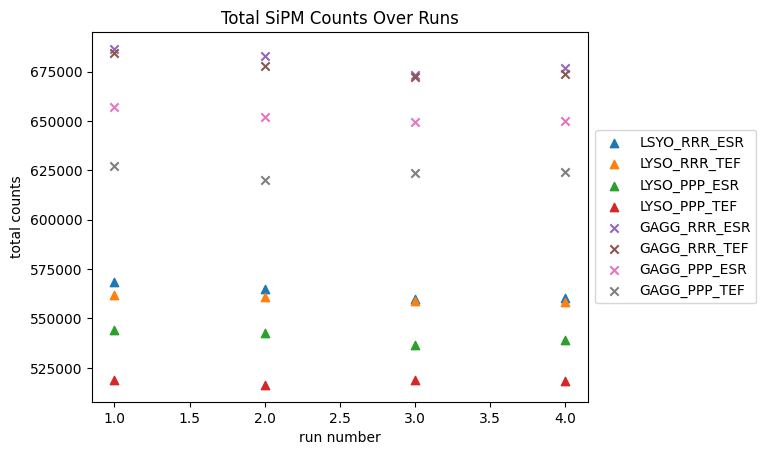

In [10]:
import matplotlib.pyplot as plt
#%matplotlib qt6

runs_dat = [1,2,3,4]

plt.scatter(runs_dat, dat2[:4],marker='^')
plt.scatter(runs_dat, dat2[4:8],marker='^')
plt.scatter(runs_dat, dat2[8:12],marker='^')
plt.scatter(runs_dat, dat2[12:16],marker='^')
plt.scatter(runs_dat, dat2[16:20],marker='x')
plt.scatter(runs_dat, dat2[20:24],marker='x')
plt.scatter(runs_dat, dat2[24:28],marker='x')
plt.scatter(runs_dat, dat2[28:32],marker='x')
plt.title('Total SiPM Counts Over Runs')
plt.legend(['LSYO_RRR_ESR', 'LYSO_RRR_TEF', 'LYSO_PPP_ESR', 'LYSO_PPP_TEF', 'GAGG_RRR_ESR', 'GAGG_RRR_TEF', 'GAGG_PPP_ESR', 'GAGG_PPP_TEF'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('run number')
plt.ylabel('total counts')
plt.show()

In [6]:
def corner_hists():
    for fold in dirorder:
        cut_name = fold.split('-')[0]
        add = fold.split('-')[1]
        soh.main(path_corners + '/' + fold, cut_name + " Corner " + add, cut_name + ' SiPM Hit Positions for Corner ' + add)
    return 0

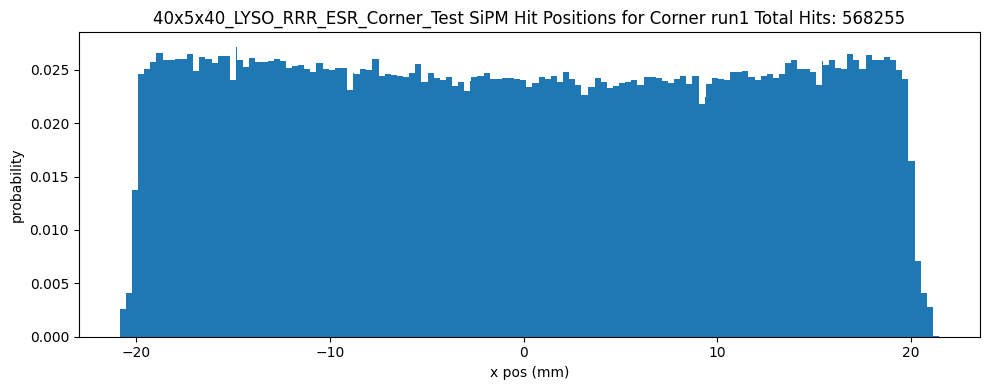

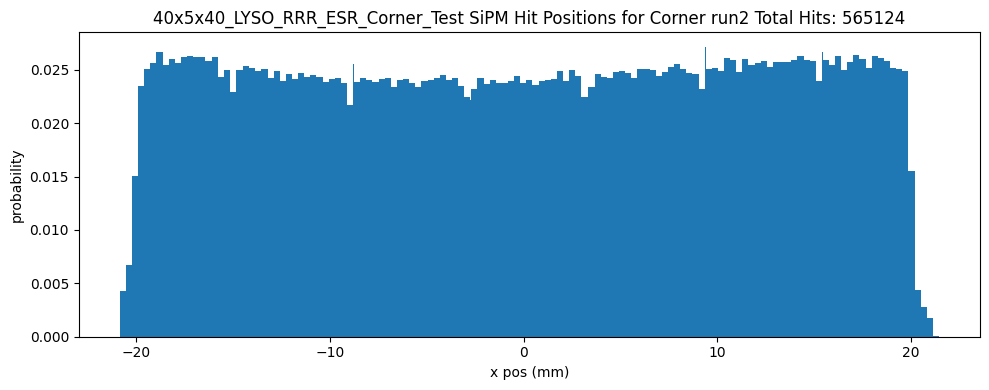

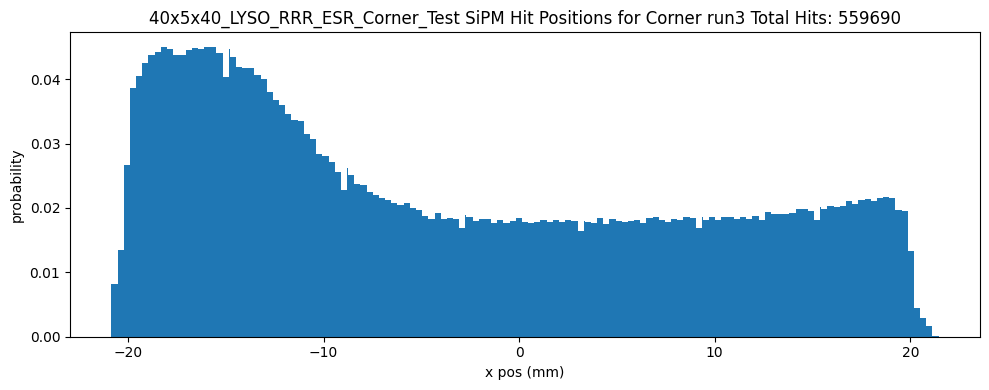

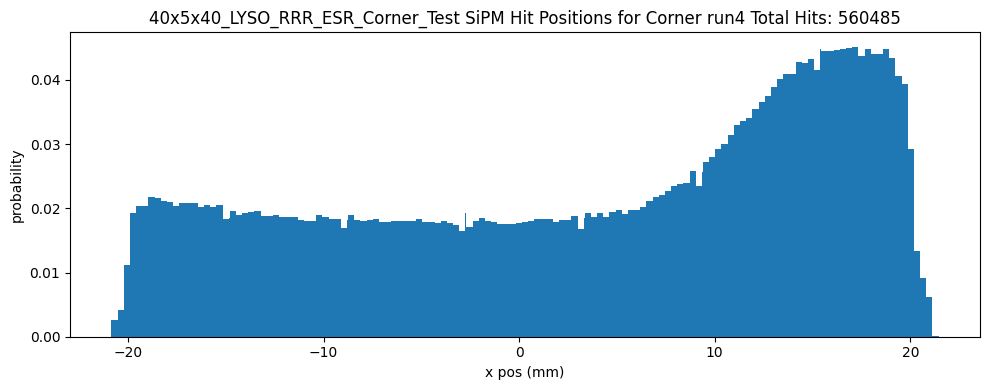

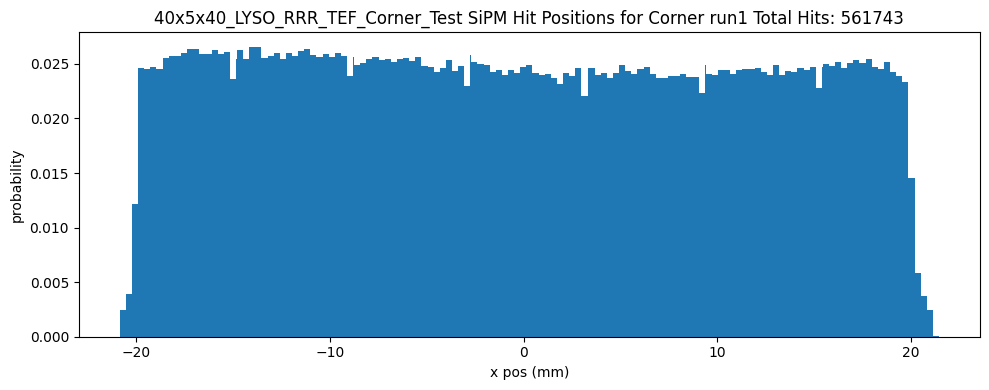

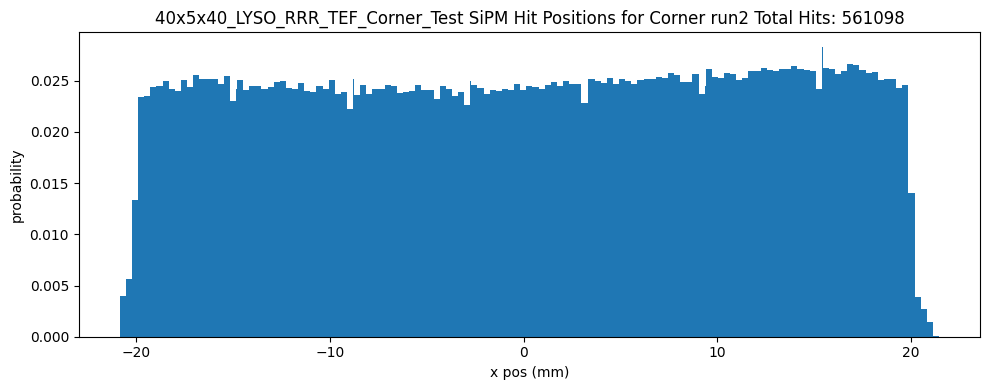

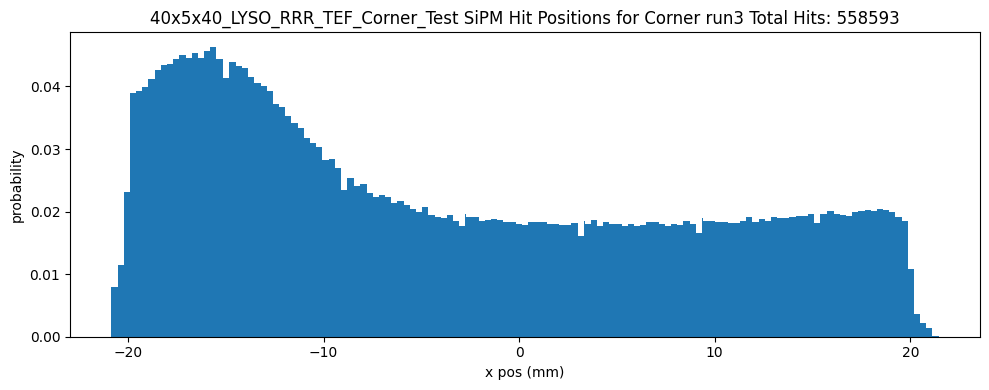

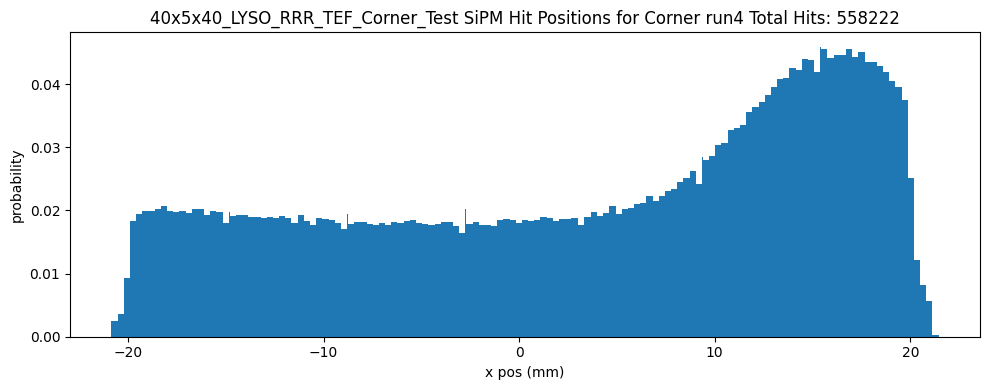

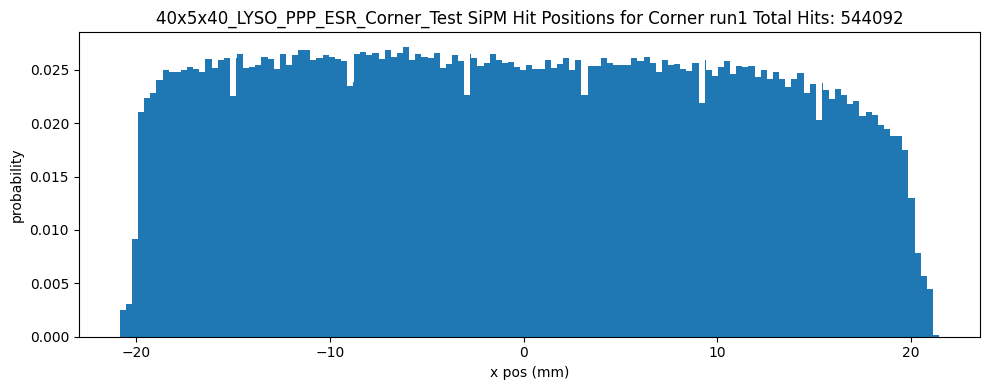

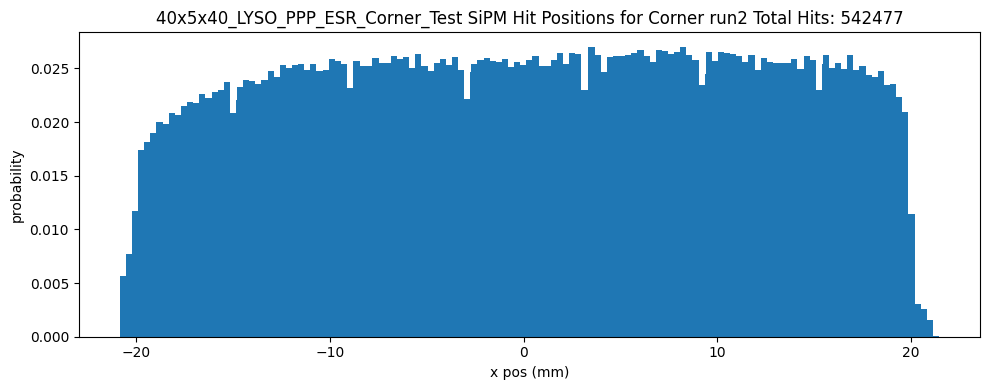

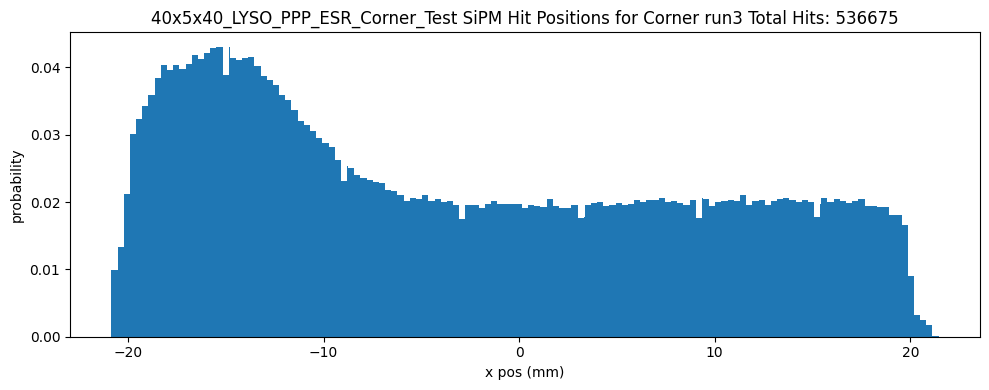

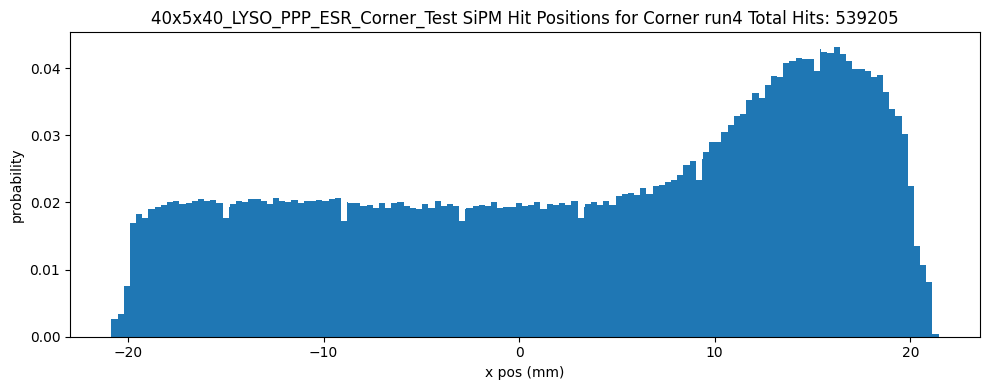

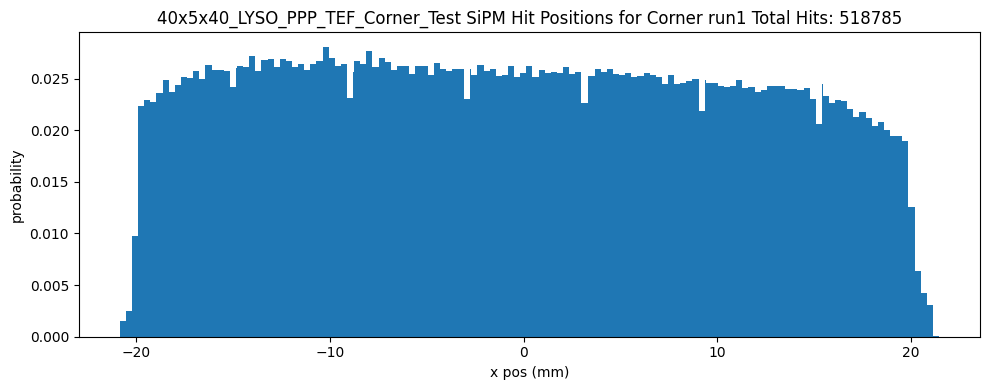

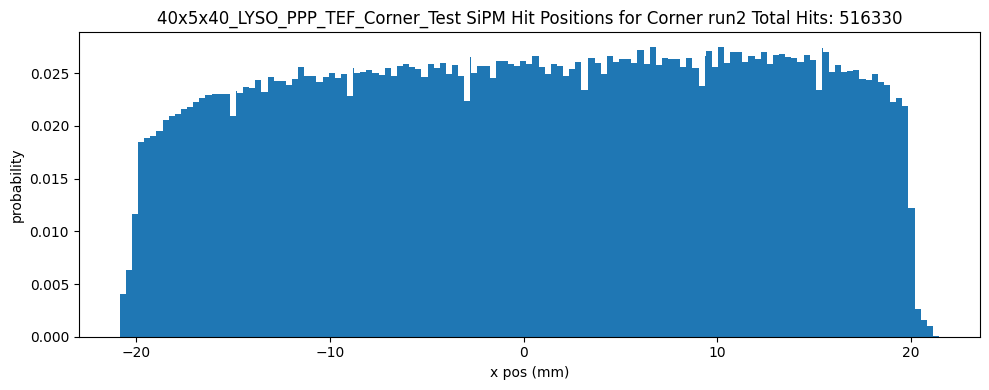

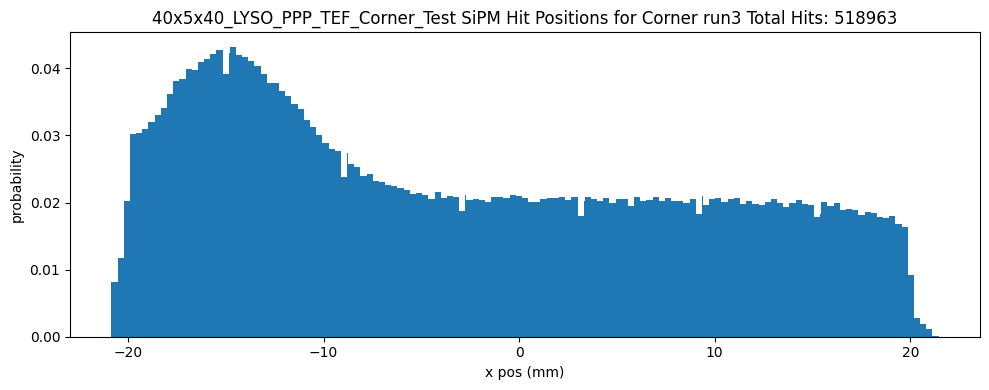

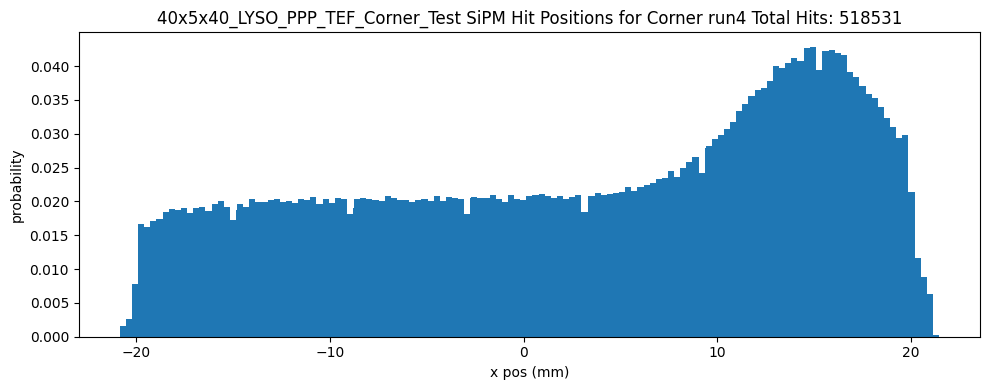

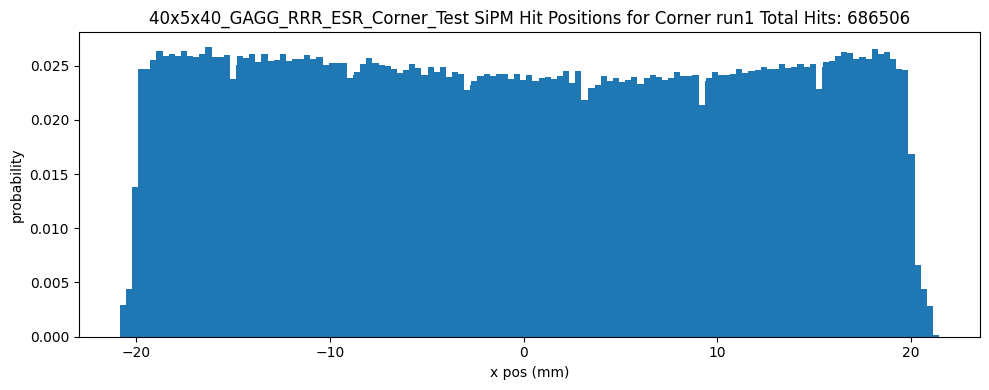

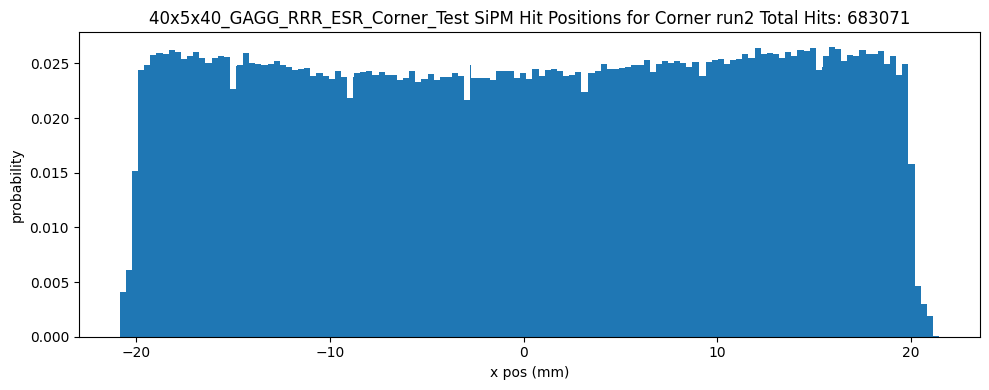

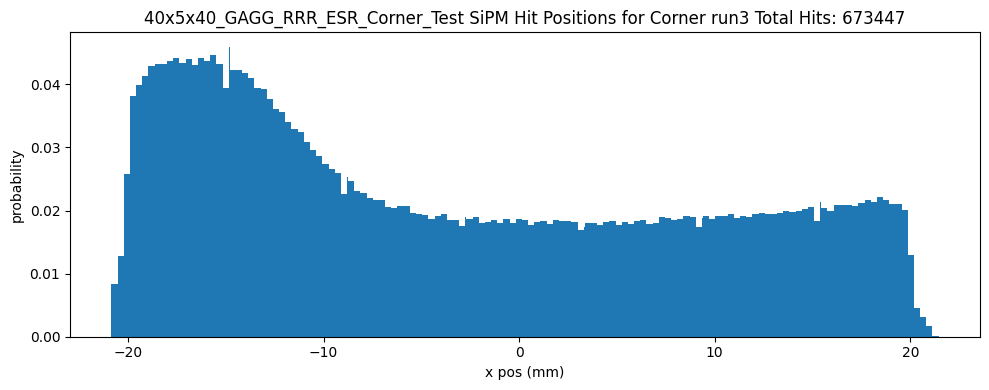

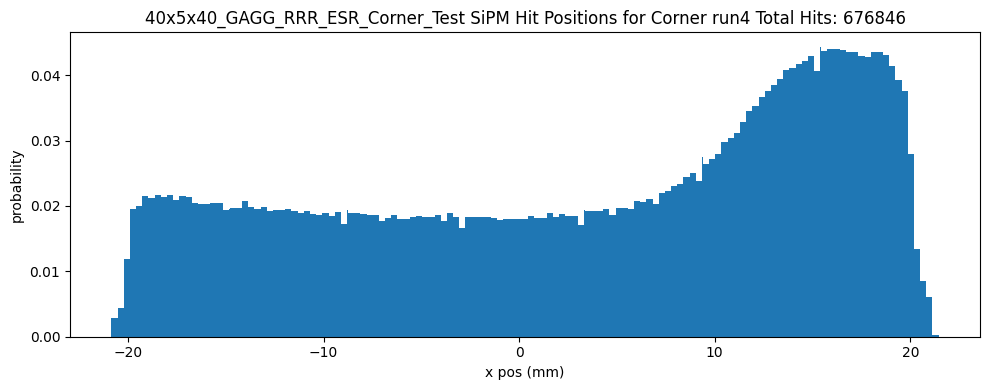

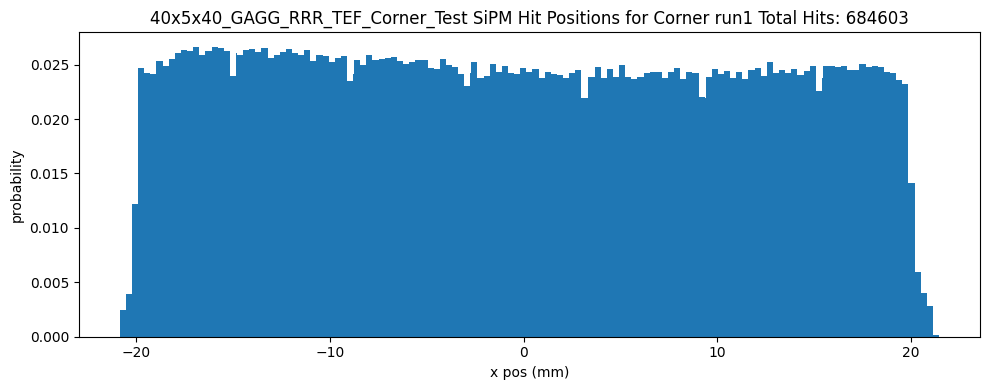

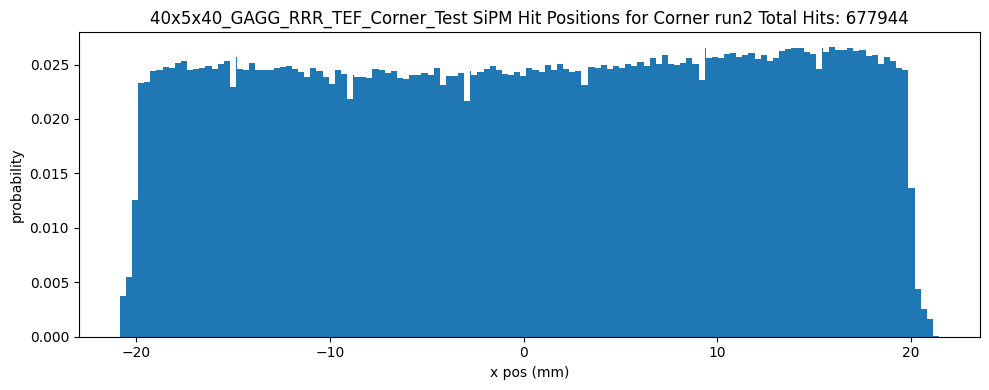

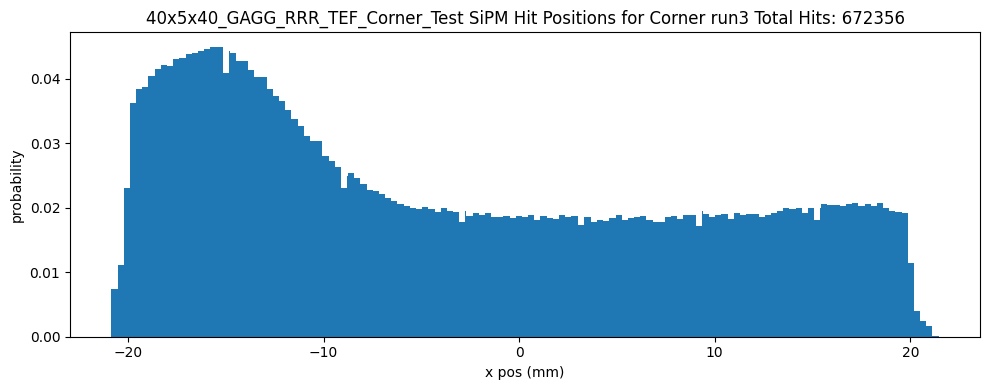

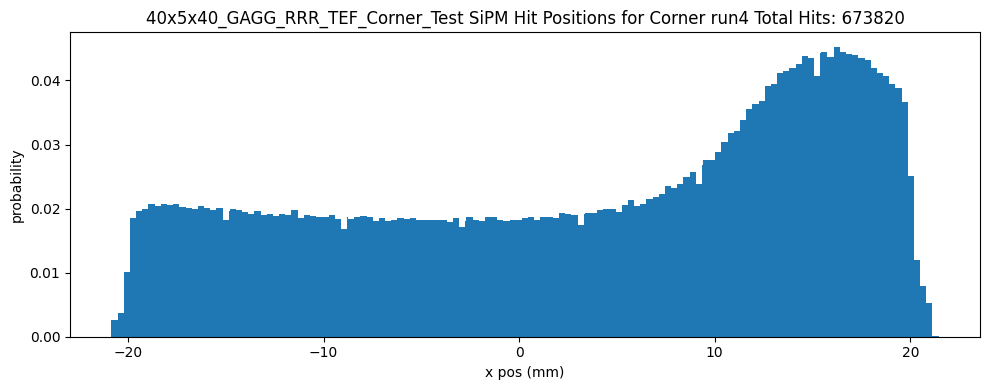

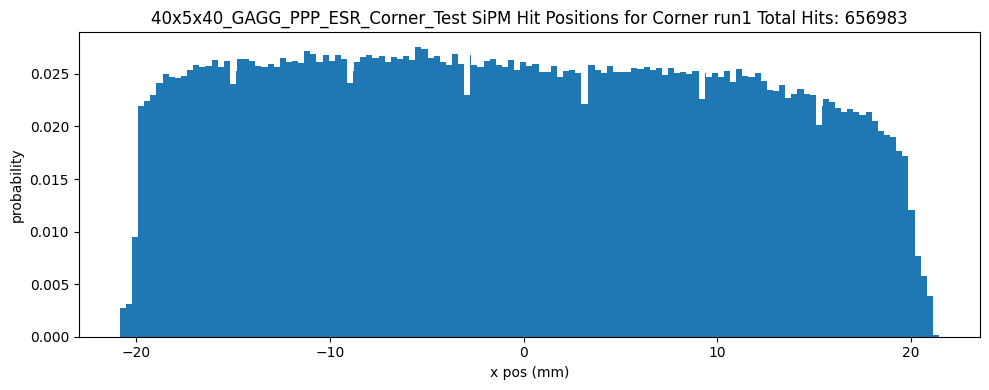

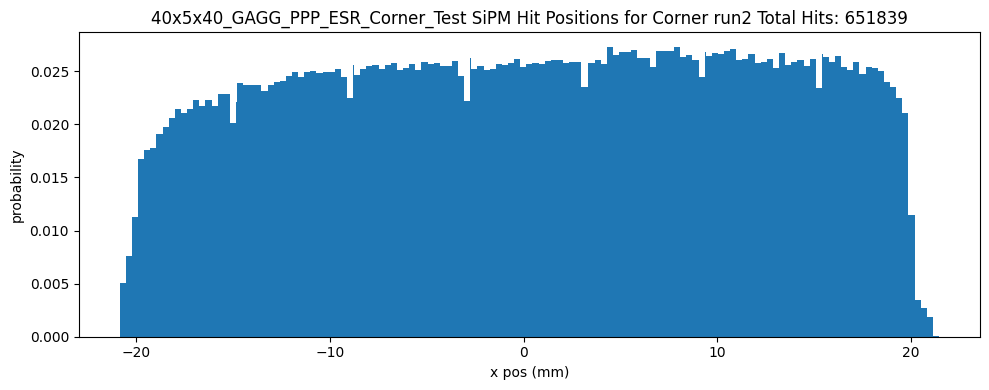

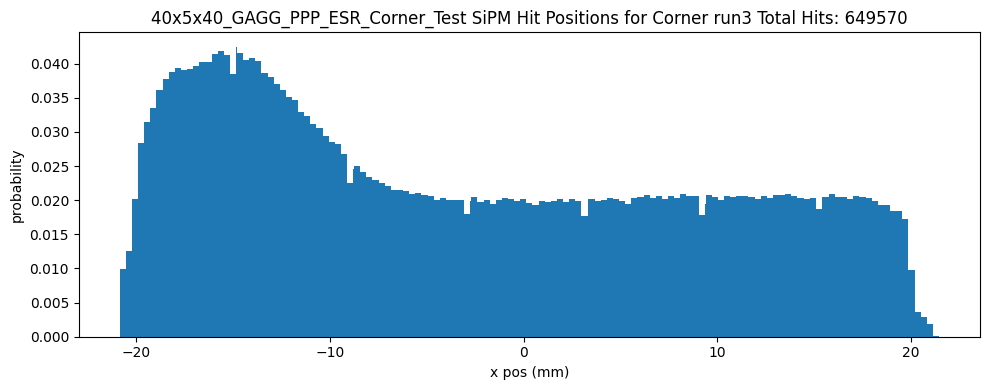

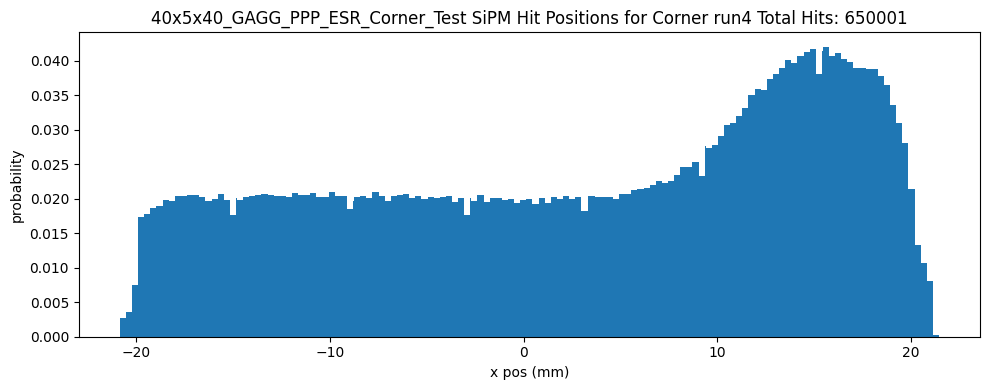

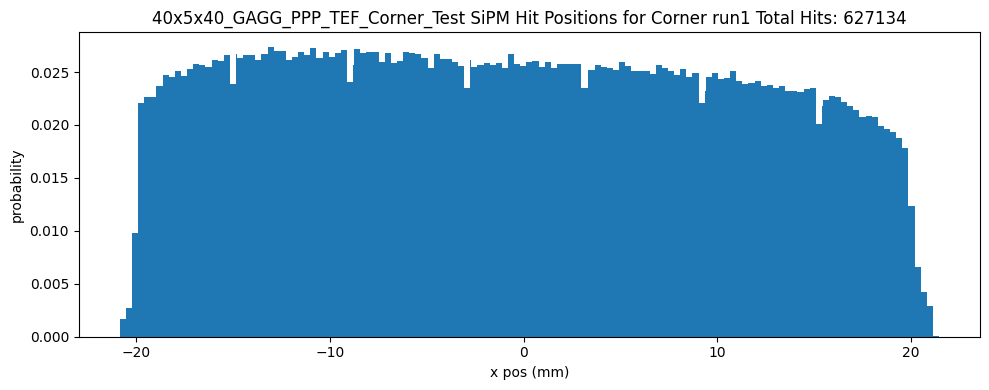

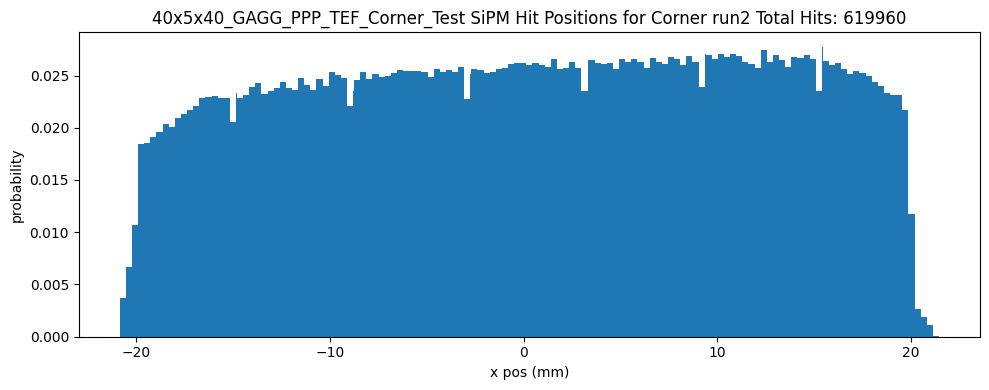

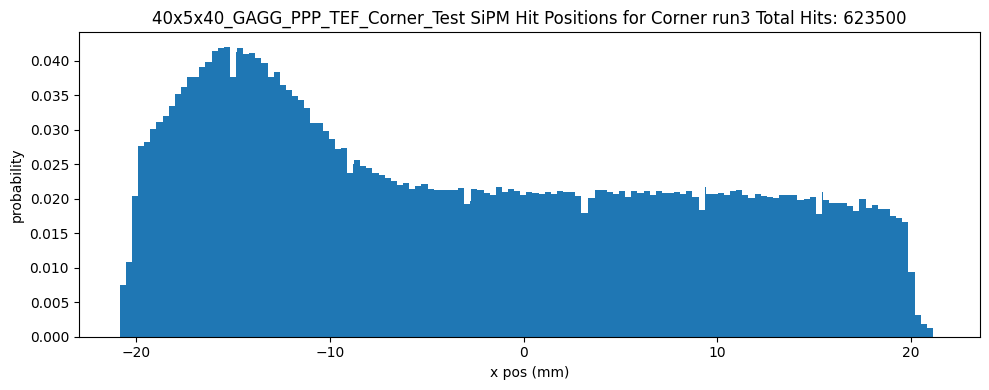

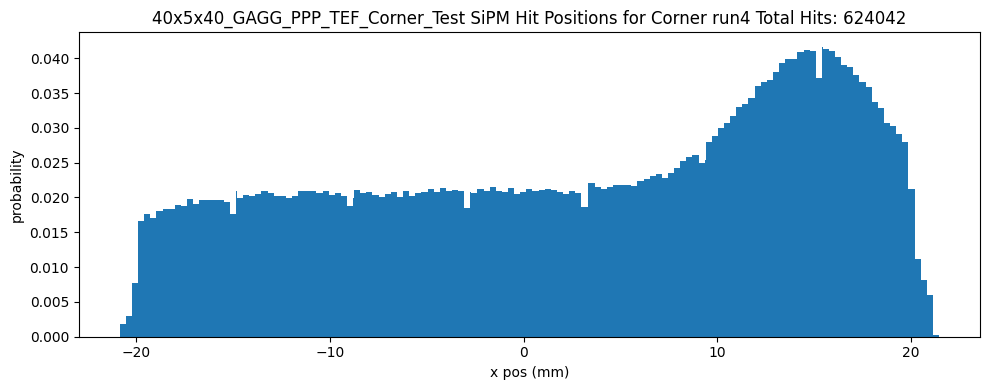

0

In [7]:
corner_hists()